In [1]:
#importing necessary libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import cv2


In [2]:
# #reading all the images from folder
# path = "D:\\face_recognisation\\data_set"
# pics = []
# count_labels = []
# labels = []
# for folder in os.listdir(path):
#     count = 0
#     for pic in os.listdir(path+'\\'+folder):
#         img=cv2.imread(path+'\\'+folder+'\\'+pic)
#         img=cv2.resize(img,(100,100))
#         pics.append(img)
#         count += 1
#     labels.append(folder)
#     count_labels.append(count)
# pics=np.array(pics)
# labels=np.array(labels)

In [3]:
# print(len(pics) , len(labels))

In [4]:
#detecting faces from an image and cropping and making resize 120 120
def detect_face(img):
  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Load the cascade
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
  face_cascade = cv2.CascadeClassifier(
      cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  # Draw rectangle around the faces and crop the faces
  for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = gray[y:y + h, x:x + w]

  # Display the output
  # plt.imshow(faces)
  # cv2.waitKey()
  return faces




In [5]:
#training the data by reading from a folder
outcomes = []
def prepare_training_data(training_data_folder_path):
  detected_faces = []
  face_labels = []
  total_pics = 0
  training_large_dirs = os.listdir(training_data_folder_path)

  for dir_name in training_large_dirs:

    # label = int(dir_name)

    training_image_path = training_data_folder_path+"/"+dir_name

    training_images_names = os.listdir(training_image_path)

    for image_name in training_images_names:
      # if(total_pics == 10):
      #   break
      total_pics += 1
      image_path = training_image_path + "/" + image_name

      image = cv2.imread(image_path)
      face = detect_face(image)
      if(len(face) == 0):
        continue

      # resized_face = cv2.resize(face, (120, 120), interpolation = cv2.INTER_AREA)

      resized_face = cv2.resize(face, (120, 120))
      detected_faces.append(resized_face)
      face_labels.append(dir_name)
    outcomes.append(dir_name)
  print(len(detected_faces))
  print(total_pics)
  return detected_faces, face_labels


In [6]:
#detecting faces and labels and calling function to detect faces
detected_faces, face_labels = prepare_training_data("mlData")
detected_faces = np.array(detected_faces)
face_labels = np.array(face_labels)

print(detected_faces.shape,face_labels.shape)

155
241
(155, 120, 120) (155,)


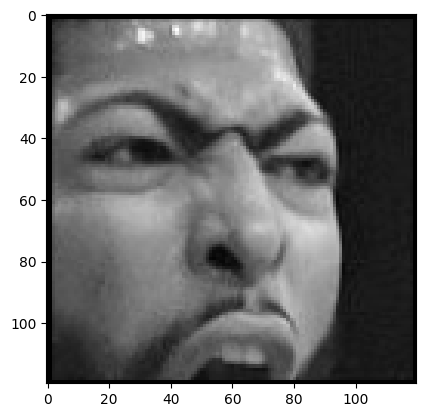

In [7]:
#example how the image will be
plt.imshow(detected_faces[2] , cmap='gray')
# print(outcomes)

In [8]:
#as image is 2d array to store more images we making images to 1d array by flatten
# and whenver required we will reshape
all_persons = []
print(detected_faces[0].shape)
for pic in detected_faces:
    person = np.array(pic)
    flatten_array = person.flatten()
    all_persons.append(flatten_array)

all_persons = np.array(all_persons)
all_persons = all_persons.transpose()
print(len(all_persons) , len(all_persons[0]))

(120, 120)
14400 155


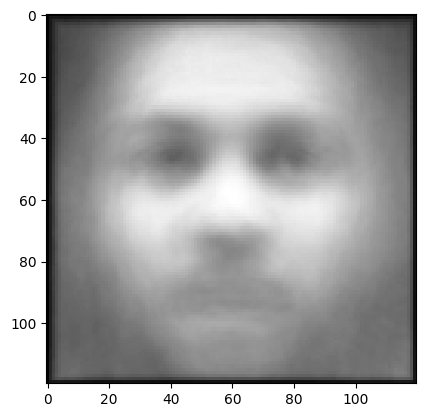

In [9]:
#mean vector calculating over all images
mean_vector = np.mean(all_persons, axis=1)
newarr = mean_vector.reshape(120 , 120)
plt.imshow(newarr, cmap='gray')


In [31]:
#normalizing our test array and calculating svd
#u = eigen vectors(orthogonal matrix)
#s = eigen values(diagonal matrix)
#vT = constants ratio of eigen vectors to get images(orthogonal)
X = all_persons - np.tile(mean_vector, (all_persons.shape[1], 1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)
print(U.shape , S.shape , VT.shape)

(14400, 155) (155,) (155, 155)


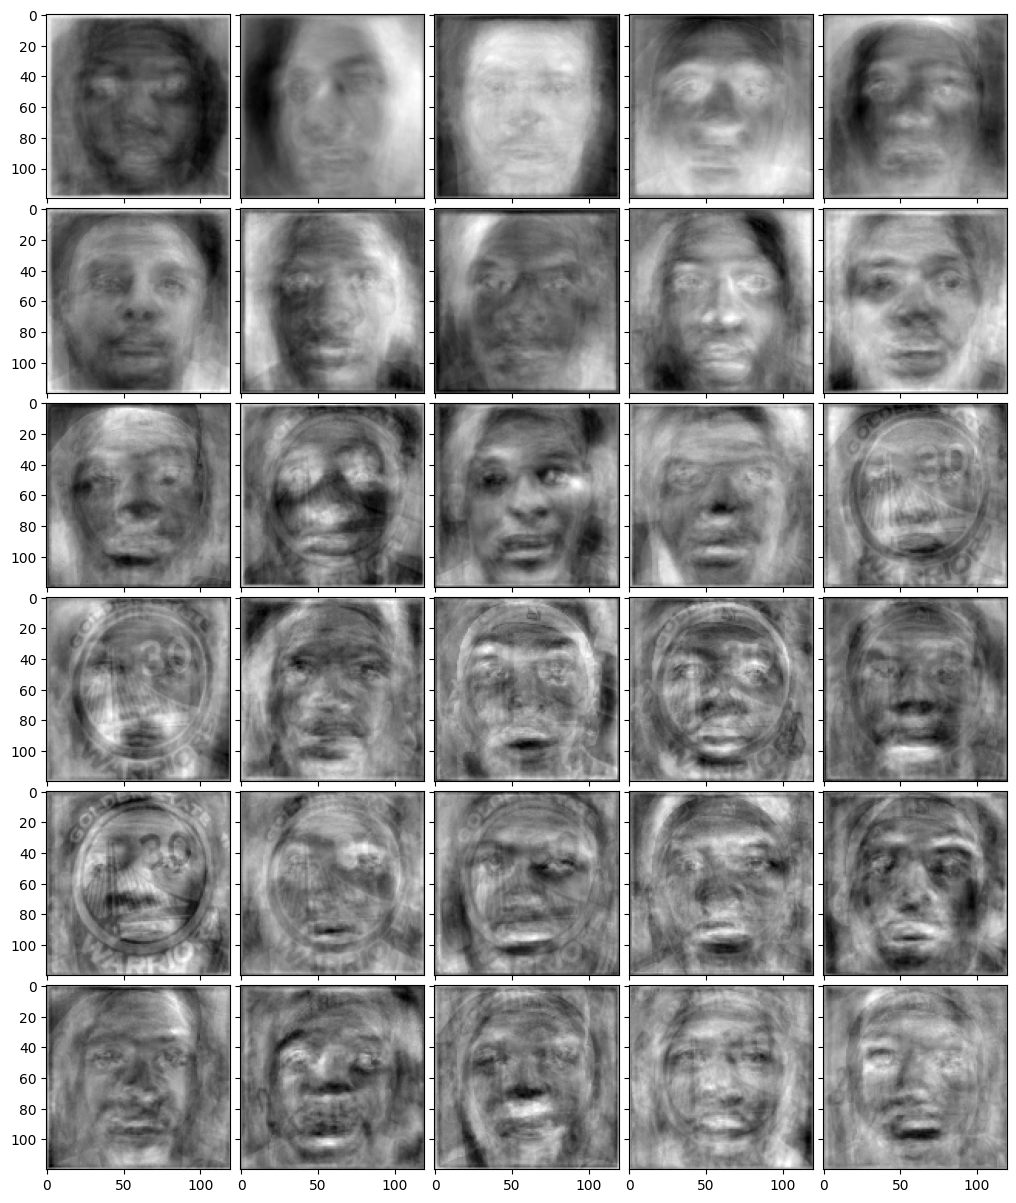

In [11]:
#showing all eigen faces from matrix U
from mpl_toolkits.axes_grid1 import ImageGrid
eigen_faces = []
m=120
n=120
for i in range(len(U[0])):
    # axarr[i , j].imshow(np.reshape(U[:, i], (m, n)).T ,cmap = 'gray' )
   #  ele = np.reshape(U[:, i], (m, n)).T
    eigen_faces.append(np.reshape(U[:, i], (m, n)))
    # plt.axis('off')


fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, eigen_faces):
    # Iterating over the grid returns the Axes.
    plt.axis('off')
    ax.imshow(im, cmap='gray')

plt.axis('off')
plt.show()


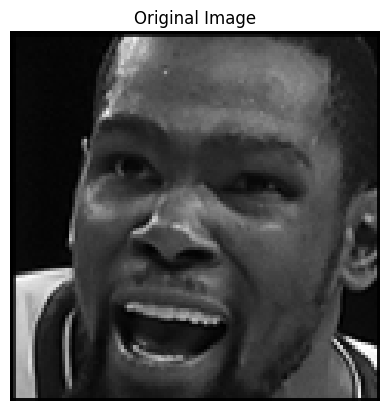

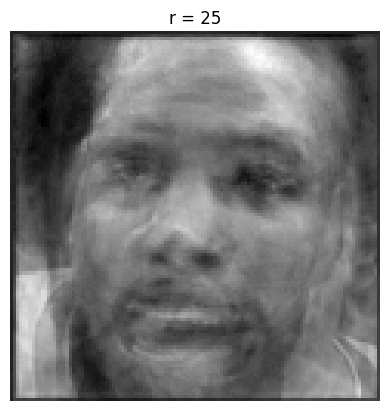

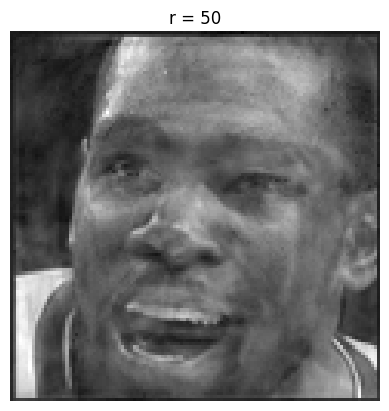

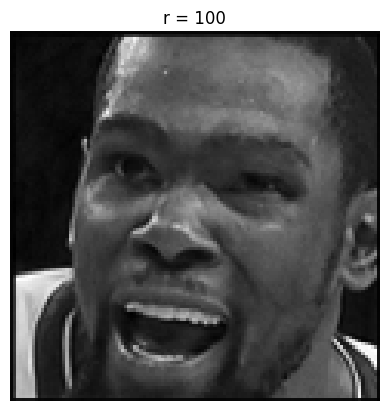

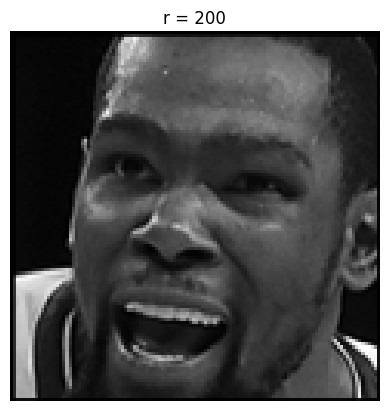

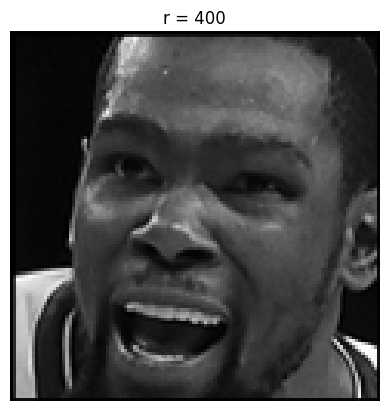

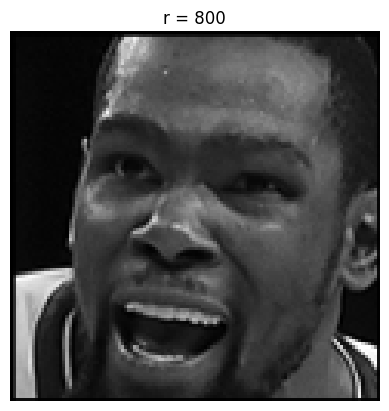

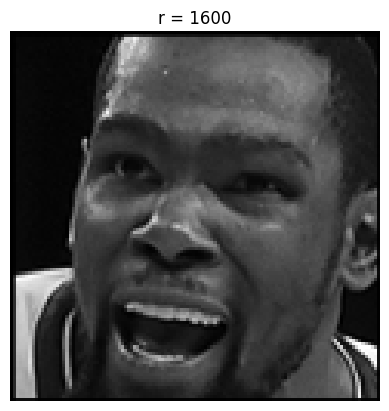

In [12]:
#SHOWING HOW THE PROCESS OF remaking of an image goes on
testFace = all_persons[: ,50]  # for image 50
plt.imshow(np.reshape(testFace, (m, n)))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# r is the no of eigen vectors you are consider
# r increase then size of an image increases
testFaceMS = testFace - mean_vector
r_list = [25, 50, 100, 200, 400, 800, 1600]

for r in r_list:
    reconFace = mean_vector + U[:, :r]  @ U[:, :r].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace, (m, n)))
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()


In [37]:
#test data from drive
test_data, test_data_labels = prepare_training_data("test_data")
test_all_persons = []
for pic in test_data:
    person = np.array(pic)
    flatten_array = person.flatten() - mean_vector
    test_all_persons.append(flatten_array)

test_all_persons = np.array(test_all_persons)
test_all_persons = test_all_persons.transpose()

test_data = test_all_persons
test_data = np.array(test_data).T
trained_data = U[:, :].transpose()

print(test_data.shape ,U.shape, trained_data.shape)


17
22
(17, 14400) (14400, 155) (155, 14400)


In [14]:
#reconstructing images from normalizing test input so the image will get from eigen faces

r = 14400
facerecog = []
for i in range(len(test_data)):
    reconstruct = mean_vector + U[:, :]  @ U[:, :].T @ test_data[i]
    facerecog.append(reconstruct)

# print(list1)

In [18]:
from skimage.metrics import structural_similarity as ssim
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err


def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap=plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap=plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()


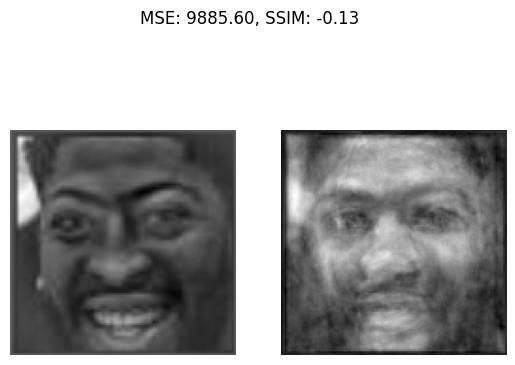

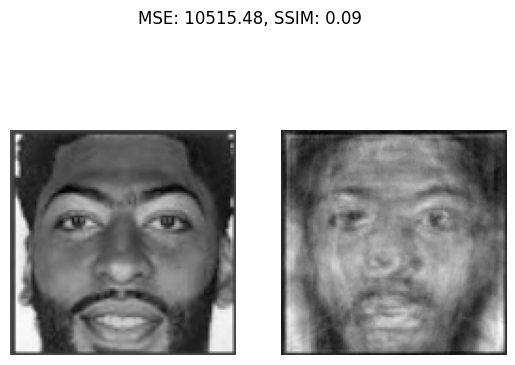

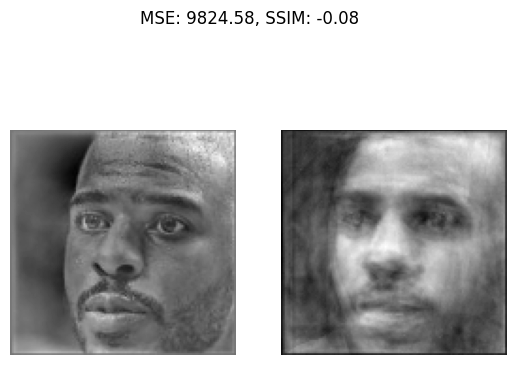

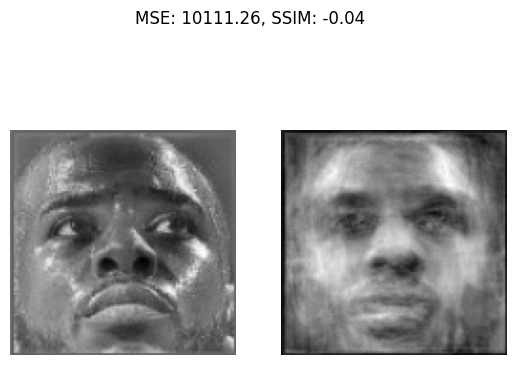

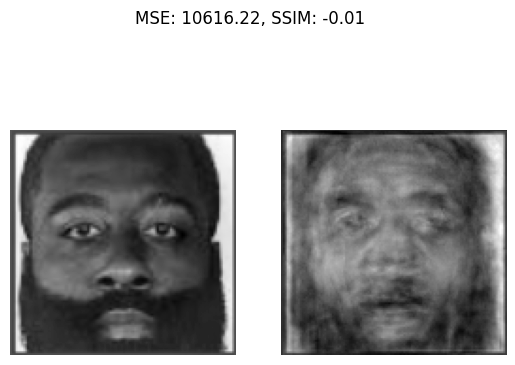

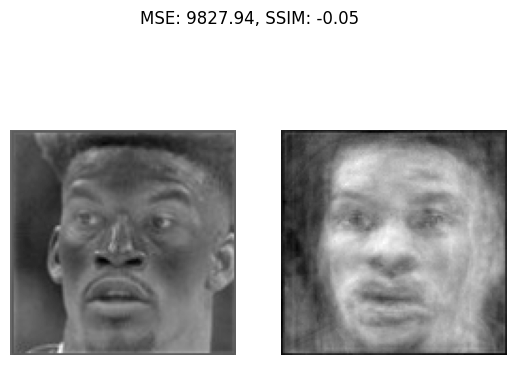

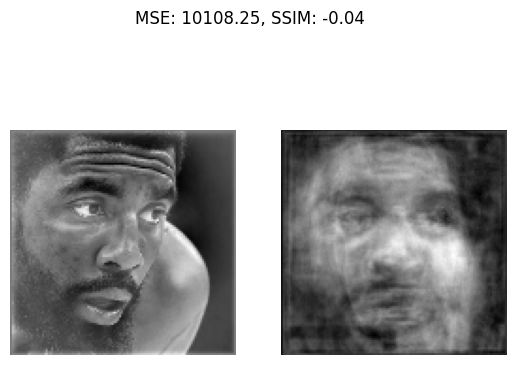

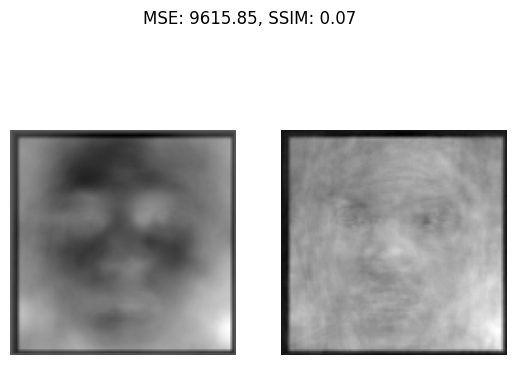

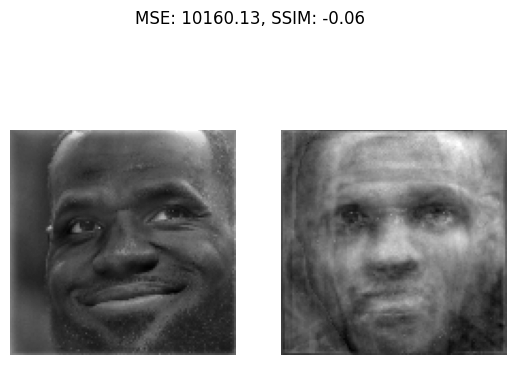

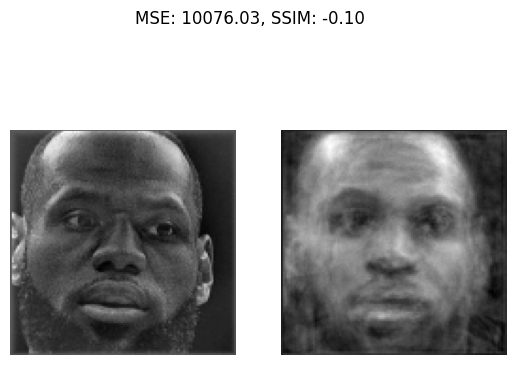

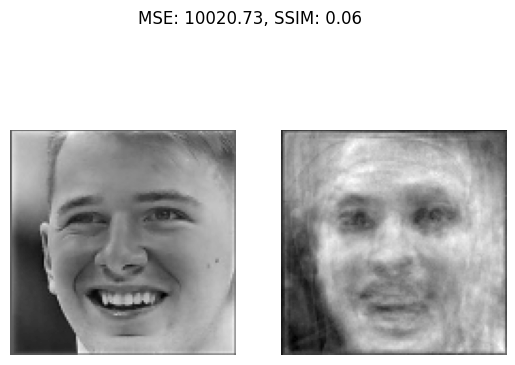

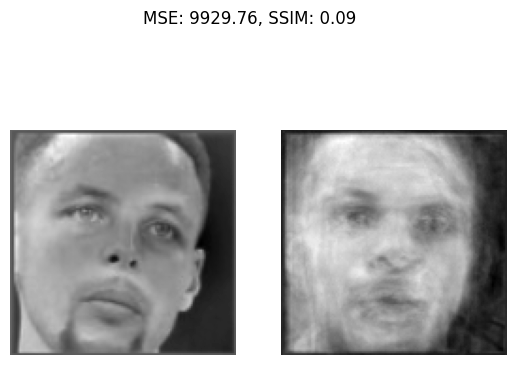

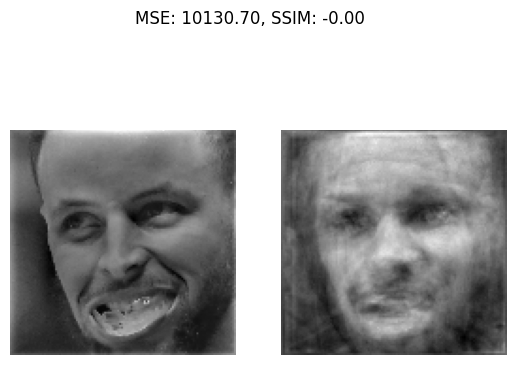

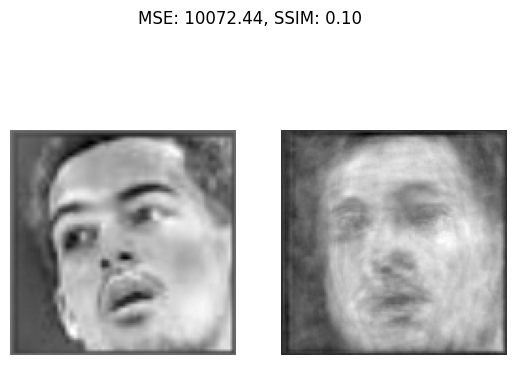

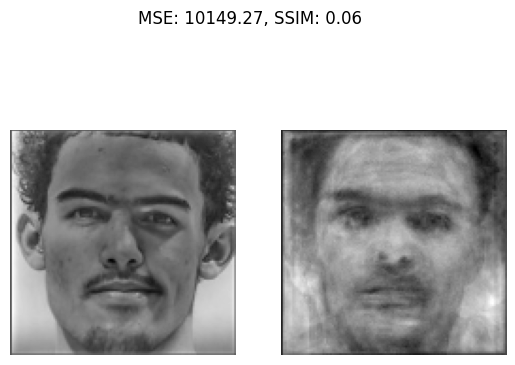

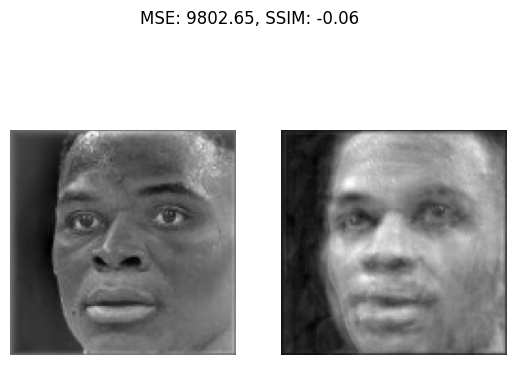

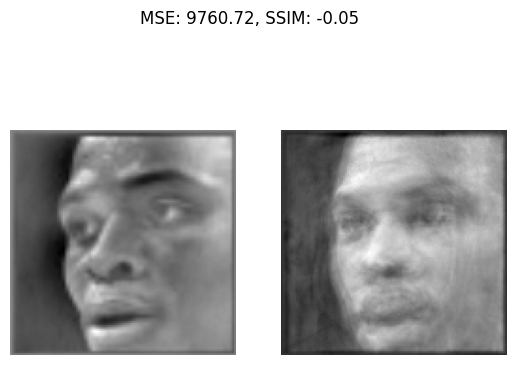

In [19]:
#showing the test image and reconstructed image

for i in range(len(test_data)):
    b = np.reshape(test_data[i], (m, n))
    a = np.reshape(facerecog[i], (m, n))
    compare_images(b , a , "testface vs reconstructface")


In [20]:
#functions that will help to find similarity
import math

from scipy import spatial


def calculate_cosine_distance(a, b):
    cosine_distance = float(spatial.distance.cosine(a, b))
    return cosine_distance


def calculate_cosine_similarity(a, b):
    cosine_similarity = 1 - calculate_cosine_distance(a, b)
    return cosine_similarity


In [21]:
#cosine similarity
print(len(test_data))
cosines = []
for i in range(0 , len(test_data)):
    sum1 = calculate_cosine_similarity(test_data[i], facerecog[i]) 
    cosines.append(abs(sum1))
    print(sum1)
sum=0
for i in cosines:
    sum = sum + i
print(sum/(len(cosines)))

17
-0.3354247891128346
0.626770297969426
-0.15320994080526118
0.1157112980097239
0.28137128498472297
-0.16870013172088938
-0.17404185865479183
0.4886037044710343
0.19799064584085047
-0.053102536261432576
0.7651945730633944
0.7410051171830039
0.5765563892894497
0.7571458950362713
0.6754717334846383
-0.01136320107044786
-0.18580240867292241
0.3710274003312409


In [ ]:
# for i in range(len(test_data)):
#     # check_faces = []
#     X = np.reshape(test_data[i], (m, n))
#     U, S, VT = np.linalg.svd(X, full_matrices=False)
#     S = np.diag(S)

#     j = 0
#     for r in (5, 20, 100 , 1600):
#         # Construct approximate image
#         Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
#         plt.figure(j+1)
#         j += 1
#         img = plt.imshow(Xapprox)
#         img.set_cmap('gray')
#         plt.axis('off')
#         plt.title('r = ' + str(r))
#         plt.show()


In [25]:
df = all_persons
df_mean = np.mean(df, 1)
print(df.shape)


(14400, 155)


In [32]:
#reducing to 3 dimensional
n = 15
dimensional_vectors = np.array(U[:, 0: n]).T
# print(eigen_vectors[:, 0:n])
print(dimensional_vectors.shape)
print(df.shape, df_mean.shape)


(15, 14400)
(14400, 155) (14400,)


In [33]:
#tranformed final reduced array in 3dimensional
df1 = []
for i in range(len(df[0])):
    df1.append(df[:, i]-df_mean)

df1 = np.array(df1).T
print(df1.shape)
tranformed_array = np.matmul(dimensional_vectors, df1)
print(tranformed_array.shape)


(14400, 155)
(15, 155)


In [41]:
all_example_hands = test_data.T

print(all_example_hands.shape)

(14400, 17)


In [43]:
# calculating euclidean distance between vectors
from math import sqrt


# calculate euclidean distance


def euclidean_distance(a, b):
  sum = 0
  for i in range(len(b)):
    sum = sum + (a[i]-b[i])**2
    # print(sum)
  return sum
  # return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a, b)))


df2 = []
for i in range(len(all_example_hands[0])):
    df2.append(all_example_hands[:, i]-df_mean)

df2 = np.array(df2).T
print(df2.shape)

test_data_normalized = np.matmul(dimensional_vectors, df2)
print(test_data_normalized.shape)
# print(test_data_normalized)

indexes = []
all_knn_possibilities = []
for i in range(len(all_example_hands[0])):
    distance = []
    test_accuracy = []
    for j in range(len(tranformed_array[0])):
      dist = euclidean_distance(tranformed_array[:, j], test_data_normalized[: , i])
      # print(dist)
      distance.append([dist , j])
    distance.sort()
    # print(distance)
    knn_indexes = []
      #storing every knn value
    # index = distance[:, 1]
    index = []
    for x in range(0,33):
        if(x%2==1):
          for y in range(0 , x):
            index.append(distance[y][1])
          knn_indexes.append(index[:x])
    # print(test_accuracy)
    all_knn_possibilities.append(knn_indexes)
    indexes.append(distance[0][1])
    
    
    

print(all_knn_possibilities)
    
      
      
    

(14400, 17)
(15, 17)
[[[133], [133, 133, 59], [133, 133, 59, 106, 133], [133, 133, 59, 106, 133, 59, 106], [133, 133, 59, 106, 133, 59, 106, 144, 23], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59, 106, 144], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59, 106, 144, 23, 4], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59, 106, 144, 23, 4, 31, 133], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59, 106, 144, 23, 4, 31, 133, 59, 106], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59, 106, 144, 23, 4, 31, 133, 59, 106, 144, 23], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59, 106, 144, 23, 4, 31, 133, 59, 106, 144, 23, 4, 31], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59, 106, 144, 23, 4, 31, 133, 59, 106, 144, 23, 4, 31, 42, 67], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59, 106, 144, 23, 4, 31, 133, 59, 106, 144, 23, 4, 31, 42, 67, 133, 59], [133, 133, 59, 106, 133, 59, 106, 144, 23, 133, 59, 106, 144, 

In [45]:
all_test_outcomes = []
for i in range(len(all_knn_possibilities)):
    each_test_outcomes = []
    for j in range(len(all_knn_possibilities[i])):
        possibilities = []
        for k in range(len(all_knn_possibilities[i][j])):
            if(test_data_labels[i]==face_labels[all_knn_possibilities[i][j][k]]):
                 possibilities.append(1)
            else:
                possibilities.append(0)
        each_test_outcomes.append(possibilities)
    all_test_outcomes.append(each_test_outcomes)

print(all_test_outcomes)


[[[0], [0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]], [[0], [0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [47]:
accuracy = []
actual = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(len(all_test_outcomes)):
    each_test_accuracy = []
    for j in range(len(all_test_outcomes[i])):
        count = 0
        for k in range((len(all_test_outcomes[i][j]))):
            if(all_test_outcomes[i][j][k] == 1):
                count += 1
        # print(count , len(all_test_outcomes[i][j]))
        each_test_accuracy.append(count/len(all_test_outcomes[i][j]))
    accuracy.append(each_test_accuracy)

print("each index indicates knn : \n", accuracy[0])
# accuracy = np.array(accuracy).T


each index indicates knn : 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.058823529411764705, 0.05263157894736842, 0.047619047619047616, 0.08695652173913043, 0.08, 0.07407407407407407, 0.06896551724137931, 0.0967741935483871]


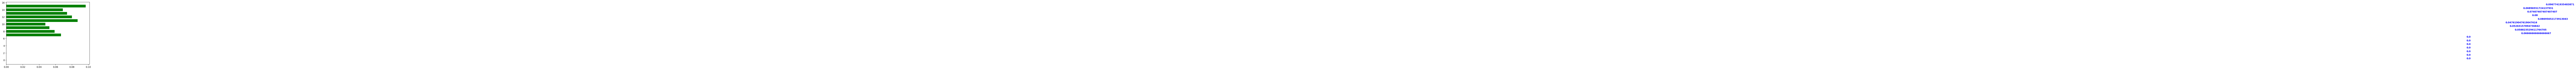

In [48]:
x = []
y = accuracy[0]
# for i in range(len(y)):
#     y[i] = y[i]*
for i in range(0, 33):
    if(i % 2 == 0):
        x.append(i)
fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(y))

ax.barh(ind, y, width, color="green")

for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v),
            color='blue', fontweight='bold')
plt.show()
